In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
import pathlib

In [2]:
import os
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,           # normalisasi data
                    horizontal_flip=True,     # data dapat berputar balik secara horizontal                  
                    ) 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    color_mode= 'rgb', 
                                                    shuffle= True
                                                    )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=64,
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  color_mode= 'rgb', 
                                                  shuffle= True
                                                  )

Found 25430 images belonging to 11 classes.
Found 6363 images belonging to 11 classes.


In [5]:
class_dict=train_generator.class_indices
classes=list(class_dict.keys())
print ('LIST OF CLASSES ', classes)
print ('CLASS DICTIONARY ',class_dict)
number_of_classes=len(classes) # this is the number of neurons in your top layer of the model
print ('Number of classes = ', number_of_classes)

LIST OF CLASSES  ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']
CLASS DICTIONARY  {'Bacterial_spot': 0, 'Early_blight': 1, 'Late_blight': 2, 'Leaf_Mold': 3, 'Septoria_leaf_spot': 4, 'Spider_mites Two-spotted_spider_mite': 5, 'Target_Spot': 6, 'Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato_mosaic_virus': 8, 'healthy': 9, 'powdery_mildew': 10}
Number of classes =  11


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                           # 3 layer konvolusi
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),                                                      # layer input untuk deep learning neural network
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),                                  # 2 hidden layer
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(11, activation= 'softmax')    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [8]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai >90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [10]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=test_generator,       
      verbose=2,
      validation_steps=4,             
      callbacks = [callbacks]
      )

Epoch 1/25
4/4 - 6s - loss: 2.4354 - accuracy: 0.1094 - val_loss: 2.4073 - val_accuracy: 0.1133 - 6s/epoch - 1s/step
Epoch 2/25
4/4 - 5s - loss: 2.3543 - accuracy: 0.1406 - val_loss: 2.2863 - val_accuracy: 0.1367 - 5s/epoch - 1s/step
Epoch 3/25
4/4 - 4s - loss: 2.2526 - accuracy: 0.1953 - val_loss: 2.1876 - val_accuracy: 0.1562 - 4s/epoch - 1s/step
Epoch 4/25
4/4 - 5s - loss: 2.1405 - accuracy: 0.1875 - val_loss: 2.1078 - val_accuracy: 0.2656 - 5s/epoch - 1s/step
Epoch 5/25
4/4 - 5s - loss: 2.1642 - accuracy: 0.2266 - val_loss: 2.0993 - val_accuracy: 0.2852 - 5s/epoch - 1s/step
Epoch 6/25
4/4 - 5s - loss: 1.9690 - accuracy: 0.3477 - val_loss: 2.0532 - val_accuracy: 0.2812 - 5s/epoch - 1s/step
Epoch 7/25
4/4 - 5s - loss: 2.0520 - accuracy: 0.2305 - val_loss: 1.8394 - val_accuracy: 0.3594 - 5s/epoch - 1s/step
Epoch 8/25
4/4 - 5s - loss: 1.8702 - accuracy: 0.3086 - val_loss: 1.7897 - val_accuracy: 0.4062 - 5s/epoch - 1s/step
Epoch 9/25
4/4 - 4s - loss: 1.8269 - accuracy: 0.3281 - val_loss

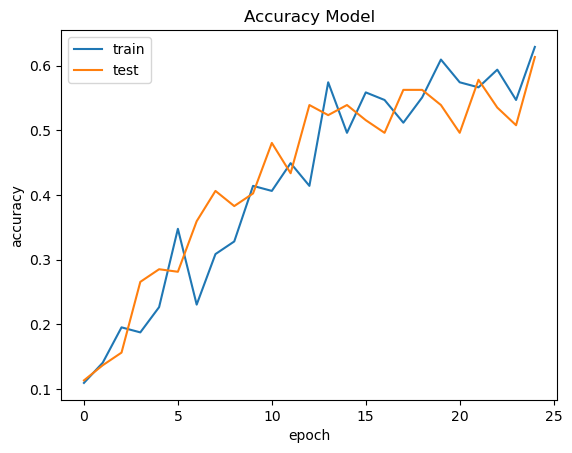

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

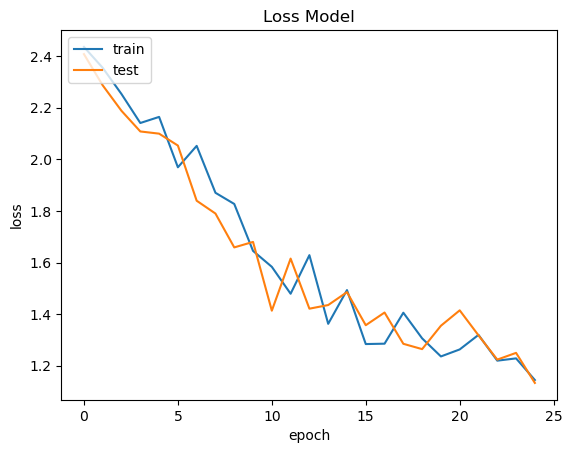

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()